In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import imdb

print(tf.version.VERSION)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


In [2]:
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17465344/17464789 [==============================] - 1s 0us/step


In [3]:
train_data[0]
train_labels[0]

max([max(sequence) for sequence in train_data])

9999

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
# setup model
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
#configuring optimzers
from tensorflow.keras import optimizers
# custom losses and metrics
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])              
    


In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 122us/sample - loss: 0.5480 - binary_accuracy: 0.7556 - val_loss: 0.4108 - val_binary_accuracy: 0.8533
Epoch 2/20
15000/15000 [==============================] - 1s 62us/sample - loss: 0.3198 - binary_accuracy: 0.8993 - val_loss: 0.3191 - val_binary_accuracy: 0.8789
Epoch 3/20
15000/15000 [==============================] - 1s 63us/sample - loss: 0.2291 - binary_accuracy: 0.9221 - val_loss: 0.2841 - val_binary_accuracy: 0.8886
Epoch 4/20
15000/15000 [==============================] - 1s 64us/sample - loss: 0.1817 - binary_accuracy: 0.9413 - val_loss: 0.2753 - val_binary_accuracy: 0.8882
Epoch 5/20
15000/15000 [==============================] - 1s 63us/sample - loss: 0.1478 - binary_accuracy: 0.9505 - val_loss: 0.2818 - val_binary_accuracy: 0.8873
Epoch 6/20
15000/15000 [==============================] - 1s 70us/sample - loss: 0.1196 - binary_accuracy: 0.9617 - val_loss: 0.3216 -

In [11]:
history_dict = history.history
history_dict.keys()
history_dict[]
len(history_dict.keys().g)

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

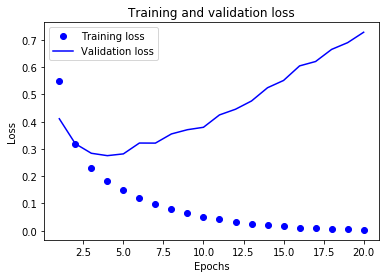

In [13]:
import matplotlib.pyplot as plt


history_dict = history.history

acc = history_dict['binary_accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # blue
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()




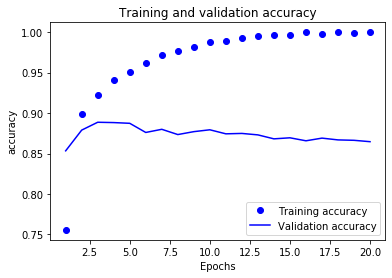

In [14]:
plt.clf() # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [19]:
def plot_accuracy(history_dict):
    
    acc = history_dict['binary_accuracy']
    
    epochs = range(1, len(acc) + 1)
    plt.clf() # clear figure
    acc_values = history_dict['binary_accuracy']
    val_acc_values = history_dict['val_binary_accuracy']

    plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()

    plt.show()

In [15]:
# Overfitting -> validation accuracy doesn't improve after 4 epoch
# traing it for 4 epochs

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

print(results)




Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 71us/sample - loss: 0.4640 - accuracy: 0.8258
Epoch 2/4
25000/25000 [==============================] - 1s 38us/sample - loss: 0.2711 - accuracy: 0.9066
Epoch 3/4
25000/25000 [==============================] - 1s 38us/sample - loss: 0.2075 - accuracy: 0.9278
Epoch 4/4
25000/25000 [==============================] - 1s 38us/sample - loss: 0.1735 - accuracy: 0.9387
25000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2875014896297455, 0.8858]


In [17]:
# Using a trained network to generate predictions on new data
model.predict(x_test)

array([[0.22675598],
       [0.9994037 ],
       [0.8576192 ],
       ...,
       [0.10608017],
       [0.07381523],
       [0.5969622 ]], dtype=float32)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 104us/sample - loss: 0.5166 - binary_accuracy: 0.7825 - val_loss: 0.3773 - val_binary_accuracy: 0.8702
Epoch 2/20
15000/15000 [==============================] - 1s 62us/sample - loss: 0.2916 - binary_accuracy: 0.9065 - val_loss: 0.2943 - val_binary_accuracy: 0.8866
Epoch 3/20
15000/15000 [==============================] - 1s 63us/sample - loss: 0.2084 - binary_accuracy: 0.9313 - val_loss: 0.2769 - val_binary_accuracy: 0.8911
Epoch 4/20
15000/15000 [==============================] - 1s 62us/sample - loss: 0.1571 - binary_accuracy: 0.9482 - val_loss: 0.2852 - val_binary_accuracy: 0.8872
Epoch 5/20
15000/15000 [==============================] - 1s 65us/sample - loss: 0.1293 - binary_accuracy: 0.9564 - val_loss: 0.4020 - val_binary_accuracy: 0.8532
Epoch 6/20
15000/15000 [==============================] - 1s 62us/sample - loss: 0.1042 - binary_accuracy: 0.9659 - val_loss: 0.3114 -

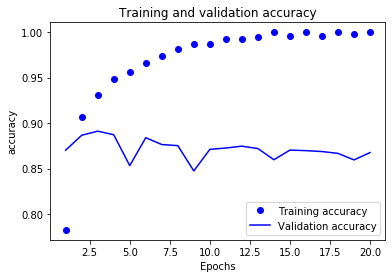

In [22]:
# experiments
# use 3 layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])   

history = model.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=512, validation_data=(x_val, y_val))

#history = model.fit(x_train, y_train, epochs=4, batch_size=512)
#results = model.evaluate(x_test, y_test)

#print(results)
history_dict = history.history

plot_accuracy(history_dict)

In [41]:
def test_hyperparameters(parameters):
    loss_function = parameters['loss_function']
    dense_layer_count = parameters['dense_layer_count']
    hidden_units = parameters['hidden_units']
    activation_function = parameters['activation_function']
    batch_size = parameters.get('batch_size') or 512
    lr = parameters.get('lr') or 0.001
    
    model = models.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation_function, input_shape=(10000,)))
    for _ in range(dense_layer_count - 1):        
        model.add(layers.Dense(hidden_units, activation=activation_function))
        
    model.add(layers.Dense(1, activation='sigmoid'))

    #model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    model.compile(optimizer=optimizers.RMSprop(lr=lr), 
                  loss=loss_function, metrics=[metrics.binary_accuracy])   
    
    history = model.fit(partial_x_train, partial_y_train,
                   epochs=10, batch_size=batch_size, validation_data=(x_val, y_val))
    
    history_dict = history.history
    results = model.evaluate(x_test, y_test, verbose=0)

    print(results)
    plot_accuracy(history_dict)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 3s 207us/sample - loss: 0.6258 - binary_accuracy: 0.7292 - val_loss: 0.3294 - val_binary_accuracy: 0.8720
Epoch 2/10
15000/15000 [==============================] - 2s 151us/sample - loss: 0.2719 - binary_accuracy: 0.8935 - val_loss: 0.3073 - val_binary_accuracy: 0.8828
Epoch 3/10
15000/15000 [==============================] - 2s 150us/sample - loss: 0.1832 - binary_accuracy: 0.9302 - val_loss: 0.3332 - val_binary_accuracy: 0.8718
Epoch 4/10
15000/15000 [==============================] - 2s 153us/sample - loss: 0.1033 - binary_accuracy: 0.9627 - val_loss: 0.4028 - val_binary_accuracy: 0.8846
Epoch 5/10
15000/15000 [==============================] - 2s 152us/sample - loss: 0.0751 - binary_accuracy: 0.9775 - val_loss: 0.4457 - val_binary_accuracy: 0.8827
Epoch 6/10
15000/15000 [==============================] - 2s 151us/sample - loss: 0.1074 - binary_accuracy: 0.9785 - val_loss: 0.3

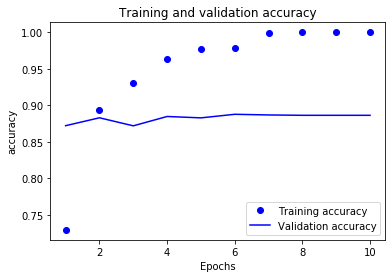

In [49]:
parameters = {'loss_function' : 'binary_crossentropy', 'dense_layer_count':6, 
              'hidden_units' : 256, 'activation_function': 'relu', 'batch_size': 512, 'lr': 0.01}
test_hyperparameters(parameters)

In [23]:
for i in range(3):
    print(i)

0
1
2


In [25]:
aa = {'loss_function' : 'mse', 'dense_layer_count':3, 'hidden_units' : 16, 'activation_function': 'relu'}
print(aa['loss_function'])

mse
